## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')
#see below for printout of duplicate mouse details

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
#find duplicates: https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
duplicate_id = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df =combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')

In [50]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

## Are they wanting us to drop the full mouse or just the duplicates?? 

249

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_tumor_df = clean_df.groupby(by = "Drug Regimen")["Tumor Volume (mm3)"]

reg_mean = regimen_tumor_df.mean()
reg_mean_df = reg_mean.to_frame(name = "Mean")

reg_median = regimen_tumor_df.median()
reg_median_df = reg_median.to_frame(name = "Median")

reg_variance = regimen_tumor_df.var()
reg_variance_df = reg_variance.to_frame(name = "Variance")

reg_std = regimen_tumor_df.std()
reg_std_df = reg_std.to_frame(name = "Standard Deviation")

# sample = regimen_tumor_df.sample(30)
# reg_SEM = sem(sample.clean_df)

#####calculating SEM ######

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.concat([reg_mean_df, reg_median_df, reg_variance_df, reg_std_df], axis = 1)
summary_df

# sample = fuel_economy.sample(30)
# print(f"The SEM value for the sample fuel economy data is {sem(sample.Combined_MPG)}")

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.382993,50.783528,43.220205,6.574208
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_tumor_df = clean_df.groupby(by = "Drug Regimen")["Tumor Volume (mm3)"]
regimen_tumor_df.describe()

######Is there a better way to do this to get specific stats?#####

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.382993,6.574208,45.000000,47.046068,50.783528,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

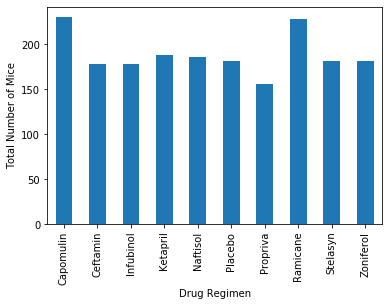

In [73]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mouse_count = clean_df.groupby(by = "Drug Regimen")["Mouse ID"].count()
mouse_bar = mouse_count.plot(kind = 'bar')
mouse_bar.set_ylabel("Total Number of Mice")
mouse_bar.set_xlabel("Drug Regimen")
plt.show()


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
